In [ ]:
# Install the Hugging Face Transformers library
!pip install transformers

# Import necessary libraries
import torch
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM

# **Masked Language Modeling (MLM)**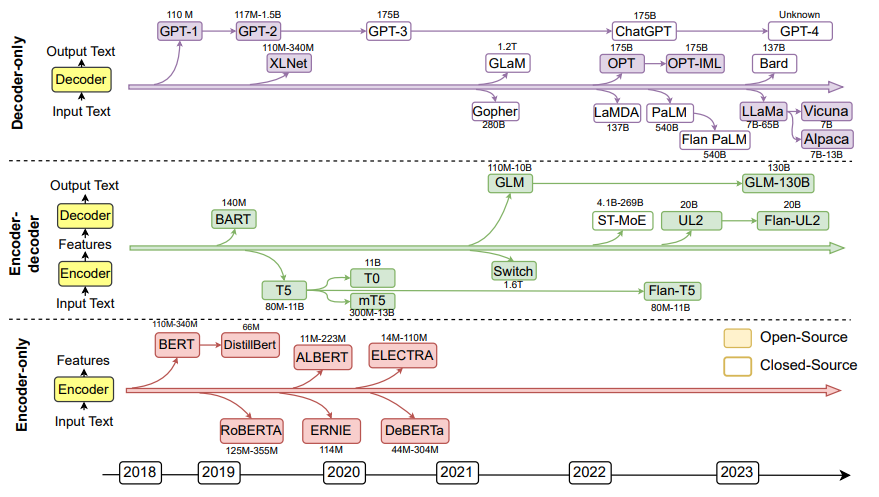

MLM employs a training method where certain tokens in the input sequence are masked and the model learns to predict these tokens based on the surrounding context. Typically utilizing the Transformer **`encoder`** architecture, MLM benefits from bidirectional context, allowing for a comprehensive understanding of both past and future tokens. This feature makes MLM particularly effective for tasks like text classification, sentiment analysis, and named entity recognition. However, one disadvantage of MLM is that it can be computationally intensive due to the need to process the entire input sequence simultaneously, posing challenges in terms of training time and resource requirements.

In [ ]:
# Load BERT model and tokenizer for Masked Language Modeling
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased")

# Create a Hugging Face pipeline for masked language modeling
mlm_pipeline = pipeline('fill-mask', model='bert-base-uncased')

# Example of Masked Language Modeling
example_sentence = "The capital of Canada is [MASK]."
mlm_result = mlm_pipeline(example_sentence)

# Display the results
print("MLM Prediction Results:")
for prediction in mlm_result:
    print(prediction)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


MLM Prediction Results:
{'score': 0.3140835165977478, 'token': 5548, 'token_str': 'montreal', 'sequence': 'the capital of canada is montreal.'}
{'score': 0.24042309820652008, 'token': 8166, 'token_str': 'ottawa', 'sequence': 'the capital of canada is ottawa.'}
{'score': 0.17467230558395386, 'token': 4361, 'token_str': 'toronto', 'sequence': 'the capital of canada is toronto.'}
{'score': 0.0818202793598175, 'token': 6930, 'token_str': 'vancouver', 'sequence': 'the capital of canada is vancouver.'}
{'score': 0.02653631754219532, 'token': 10475, 'token_str': 'halifax', 'sequence': 'the capital of canada is halifax.'}


# **Sequence-to-Sequence (Seq2Seq)**

Seq2Seq models consist of an `encoder-decoder` architecture, where the encoder processes the input sequence and the decoder generates the output sequence. This approach is commonly used in tasks like machine translation, summarization, and question-answering. Seq2Seq models can handle more complex tasks that involve input-output transformations, making them versatile for a wide range of NLP tasks.

In [ ]:
# Load T5 model and tokenizer for Seq2Seq tasks
tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Example of translation: English to German
input_text = "translate English to French: Welcome to Canada."
inputs = tokenizer(input_text, return_tensors="pt")

# Generate translation
outputs = model.generate(inputs['input_ids'])
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Display the results
print("Translation Result:", translated_text)

Translation Result: Bienvenue au Canada.


# **Causal Language Modeling (CLM)**

CLM is an autoregressive method where the model, typically using the Transformer `decoder` architecture, is trained to predict the next token in a sequence given the previous tokens. CLM is used in models like GPT-2 and GPT-3 and is well-suited for tasks such as text generation and summarization. However, CLM models have unidirectional context, meaning they only consider the past and not the future context when generating predictions.

In [ ]:
# Load GPT-2 model and tokenizer for Causal Language Modeling
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Text generation using GPT-2
input_text = "In a distant future, humanity has"
inputs = tokenizer.encode(input_text, return_tensors='pt')

# Generate text with sampling enabled
outputs = model.generate(inputs, max_length=50, num_return_sequences=1, do_sample=True)
generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

# Display the results
print("Generated Texts:")
for text in generated_texts:
    print(text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Texts:
In a distant future, humanity has emerged victorious in the struggle against the great forces of the cosmic war, in which the human race is facing the greatest challenges imaginable for the survival of life and the universe; the great technological advancements in our time have rendered


Representative large language models in recent years. Open-source models are represented by solid squares, while closed source
models are represented by hollow squares.

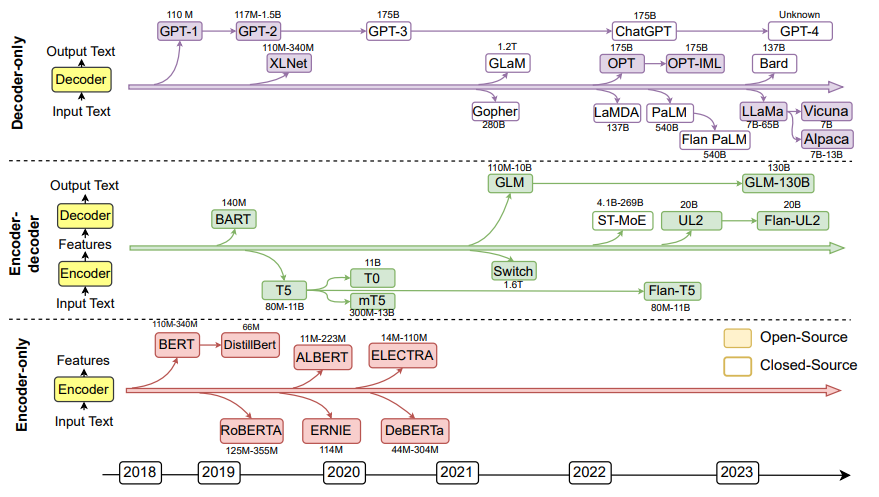

`Image credits: Pan, Shirui, et al. "Unifying large language models and knowledge graphs: A roadmap." IEEE Transactions on Knowledge and Data Engineering (2024).`